In [1]:
from IPython.display import Image

In [2]:
Image(url="https://www.cntk.ai/jup/cancer_data_plot.jpg",width=400,height=400)

In [5]:
Image(url="https://www.cntk.ai/jup/cancer_classify_plot.jpg",width=400,height=400)

In [8]:
Image(url="https://www.cntk.ai/jup/logistic_neuron.jpg",width=300,height=200)


In [1]:
# Import the relevant components
from  __future__ import print_function
import numpy as np
import sys
import os

import cntk as C
import cntk.tests.test_utils
cntk.tests.test_utils.set_device_from_pytest_env()
C.cntk_py.set_fixed_random_seed(1)

ImportError: /home/asus/Anaconda3/lib/python3.5/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `CXXABI_1.3.8' not found (required by /home/asus/.local/lib/python3.5/site-packages/_cntk_py.cpython-35m-x86_64-linux-gnu.so)

In [12]:
# Import the relevant components
from __future__ import print_function
import numpy as np
import sys
import os

import cntk as C
import cntk.tests.test_utils
cntk.tests.test_utils.set_device_from_pytest_env() # (only needed for our build system)
C.cntk_py.set_fixed_random_seed(1) # fix the random seed so that LR examples are repeatable

In [23]:
#Define the network
input_dim = 2
num_output_classes = 2

In [24]:
np.random.seed(0)

In [31]:
def generate_random_data_sample(sample_size,feature_dim,num_classes):
    Y = np.random.randint(size=(sample_size,1),low = 0,high = num_classes)
    X = (np.random.randn(sample_size,feature_dim)+3)*(Y+1)
    X = X.astype(np.float32)
    class_ind = [Y==class_number for class_number in range(num_classes)]
    Y = np.asarray(np.hstack(class_ind),dtype=np.float32)
    return X,Y
#Define the network
input_dim = 2
num_output_classes = 2
mysamplesize = 32
features,labels = generate_random_data_sample(mysamplesize,input_dim,num_output_classes)

NameError: name 'num_output_classss' is not defined

In [32]:
def generate_random_data_sample(sample_size,feature_dim,num_classes):
    Y = np.random.randint(size=(sample_size,1),low = 0,high = num_classes)
    X = (np.random.randn(sample_size,feature_dim)+3)*(Y+1)
    X = X.astype(np.float32)
    class_ind = [Y==class_number for class_number in range(num_classes)]
    Y = np.asarray(np.hstack(class_ind),dtype=np.float32)
    return X,Y
#Define the network
input_dim = 2
num_output_classes = 2
mysamplesize = 32
features,labels = generate_random_data_sample(mysamplesize,input_dim,num_output_classes)

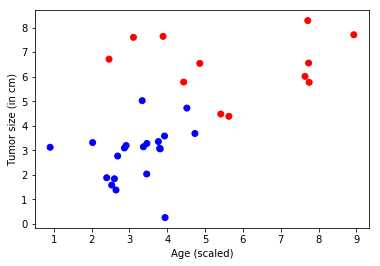

In [34]:
# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

# let 0 represent malignant/red and 1 represent benign/blue
colors = ['r' if label == 0 else 'b' for label in labels[:,0]]

plt.scatter(features[:,0], features[:,1], c=colors)
plt.xlabel("Age (scaled)")
plt.ylabel("Tumor size (in cm)")
plt.show()

In [35]:
labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
features

array([[2.6465683 , 1.3835258 ],
       [5.416325  , 4.4770155 ],
       [7.715848  , 8.282204  ],
       [8.933157  , 7.705104  ],
       [2.401346  , 1.8841031 ],
       [3.766663  , 3.3562927 ],
       [2.462923  , 6.7109637 ],
       [3.81452   , 3.0589256 ],
       [5.629893  , 4.384703  ],
       [3.1069305 , 7.600596  ],
       [2.6908855 , 2.7665334 ],
       [4.7327213 , 3.6845012 ],
       [3.370825  , 3.1420617 ],
       [4.5199947 , 4.719589  ],
       [3.929505  , 3.5822246 ],
       [0.90539694, 3.1237218 ],
       [2.869893  , 3.0939531 ],
       [3.943046  , 0.26032284],
       [4.861376  , 6.5398088 ],
       [2.5331545 , 1.5830939 ],
       [7.737927  , 6.553744  ],
       [2.0288954 , 3.3148172 ],
       [7.6431713 , 6.0105853 ],
       [3.8005648 , 3.0782602 ],
       [2.604771  , 1.8405795 ],
       [2.9140692 , 3.194293  ],
       [7.7516656 , 5.769785  ],
       [3.4574156 , 2.035388  ],
       [4.4347415 , 5.7792215 ],
       [3.890743  , 7.640496  ],
       [3.

In [37]:

Image(url= "https://www.cntk.ai/jup/logistic_neuron2.jpg", width=300, height=200)


In [38]:
feature = C.input_variable(input_dim, np.float32)

In [39]:


# Define a dictionary to store the model parameters
mydict = {}

def linear_layer(input_var, output_dim):

    input_dim = input_var.shape[0]
    weight_param = C.parameter(shape=(input_dim, output_dim))
    bias_param = C.parameter(shape=(output_dim))

    mydict['w'], mydict['b'] = weight_param, bias_param

    return C.times(input_var, weight_param) + bias_param



In [40]:
output_dim = num_output_classes
z = linear_layer(feature, output_dim)

In [41]:
label = C.input_variable(num_output_classes, np.float32)
loss = C.cross_entropy_with_softmax(z, label)

In [42]:
eval_error = C.classification_error(z, label)

In [44]:
# Instantiate the trainer object to drive the model training
learning_rate = 0.5
lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch)
learner = C.sgd(z.parameters, lr_schedule)
trainer = C.Trainer(z, (loss, eval_error), [learner])




In [45]:
# Define a utility function to compute the moving average.
# A more efficient implementation is possible with np.cumsum() function
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# Define a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss, eval_error = "NA", "NA"

    if mb % frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose:
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}".format(mb, training_loss, eval_error))

    return mb, training_loss, eval_error

In [46]:
# Initialize the parameters for the trainer
minibatch_size = 25
num_samples_to_train = 20000
num_minibatches_to_train = int(num_samples_to_train  / minibatch_size)


In [47]:
from collections import defaultdict

# Run the trainer and perform model training
training_progress_output_freq = 50
plotdata = defaultdict(list)

for i in range(0, num_minibatches_to_train):
    features, labels = generate_random_data_sample(minibatch_size, input_dim, num_output_classes)

    # Assign the minibatch data to the input variables and train the model on the minibatch
    trainer.train_minibatch({feature : features, label : labels})
    batchsize, loss, error = print_training_progress(trainer, i,
                                                     training_progress_output_freq, verbose=1)

    if not (loss == "NA" or error =="NA"):
        plotdata["batchsize"].append(batchsize)
        plotdata["loss"].append(loss)
        plotdata["error"].append(error)

Minibatch: 0, Loss: 0.6931, Error: 0.52
Minibatch: 50, Loss: 11.5741, Error: 0.72
Minibatch: 100, Loss: 0.5810, Error: 0.28
Minibatch: 150, Loss: 0.1009, Error: 0.08
Minibatch: 200, Loss: 0.3561, Error: 0.12
Minibatch: 250, Loss: 0.2264, Error: 0.12
Minibatch: 300, Loss: 0.0461, Error: 0.00
Minibatch: 350, Loss: 0.3376, Error: 0.24
Minibatch: 400, Loss: 0.3747, Error: 0.16
Minibatch: 450, Loss: 0.2555, Error: 0.08
Minibatch: 500, Loss: 0.6440, Error: 0.20
Minibatch: 550, Loss: 0.3809, Error: 0.16
Minibatch: 600, Loss: 0.0407, Error: 0.00
Minibatch: 650, Loss: 0.0379, Error: 0.00
Minibatch: 700, Loss: 0.1902, Error: 0.08
Minibatch: 750, Loss: 0.1612, Error: 0.04


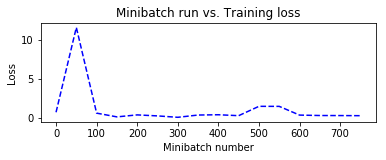

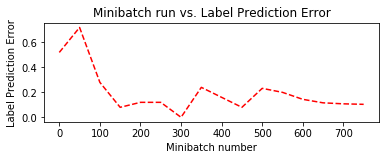

In [48]:
# Compute the moving average loss to smooth out the noise in SGD
plotdata["avgloss"] = moving_average(plotdata["loss"])
plotdata["avgerror"] = moving_average(plotdata["error"])

# Plot the training loss and the training error
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')

plt.show()

plt.subplot(212)
plt.plot(plotdata["batchsize"], plotdata["avgerror"], 'r--')
plt.xlabel('Minibatch number')
plt.ylabel('Label Prediction Error')
plt.title('Minibatch run vs. Label Prediction Error')
plt.show()

In [49]:
# Run the trained model on a newly generated dataset
test_minibatch_size = 25
features, labels = generate_random_data_sample(test_minibatch_size, input_dim, num_output_classes)

trainer.test_minibatch({feature : features, label : labels})

0.12

In [50]:
# Run the trained model on a newly generated dataset
test_minibatch_size = 25
features, labels = generate_random_data_sample(test_minibatch_size, input_dim, num_output_classes)

trainer.test_minibatch({feature : features, label : labels})

0.08

In [51]:
# Run the trained model on a newly generated dataset
test_minibatch_size = 25
features, labels = generate_random_data_sample(test_minibatch_size, input_dim, num_output_classes)

trainer.test_minibatch({feature : features, label : labels})

0.08

In [52]:
# Run the trained model on a newly generated dataset
test_minibatch_size = 25
features, labels = generate_random_data_sample(test_minibatch_size, input_dim, num_output_classes)

trainer.test_minibatch({feature : features, label : labels})

0.08

In [53]:
out = C.softmax(z)
result = out.eval({feature : features})

In [54]:
print("Label    :", [np.argmax(label) for label in labels])
print("Predicted:", [np.argmax(x) for x in result])

Label    : [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
Predicted: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]


[ 8.123076 -8.123075]


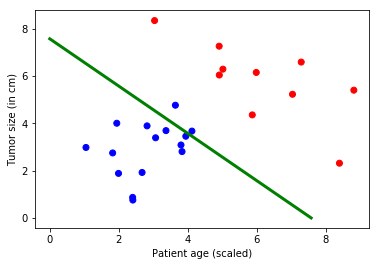

In [55]:
# Model parameters
print(mydict['b'].value)

bias_vector   = mydict['b'].value
weight_matrix = mydict['w'].value

# Plot the data
import matplotlib.pyplot as plt

# let 0 represent malignant/red, and 1 represent benign/blue
colors = ['r' if label == 0 else 'b' for label in labels[:,0]]
plt.scatter(features[:,0], features[:,1], c=colors)
plt.plot([0, bias_vector[0]/weight_matrix[0][1]],
         [ bias_vector[1]/weight_matrix[0][0], 0], c = 'g', lw = 3)
plt.xlabel("Patient age (scaled)")
plt.ylabel("Tumor size (in cm)")
plt.show()

In [56]:
features


array([[5.019382  , 6.2943654 ],
       [7.037906  , 5.232088  ],
       [5.9870596 , 6.154882  ],
       [8.398652  , 2.315265  ],
       [3.804146  , 3.0865443 ],
       [3.943896  , 3.455917  ],
       [1.0489587 , 2.9812536 ],
       [2.4028313 , 0.8692612 ],
       [1.9921147 , 1.8840163 ],
       [3.067955  , 3.3910646 ],
       [7.2901964 , 6.594136  ],
       [3.0384662 , 8.350179  ],
       [3.6418598 , 4.768497  ],
       [4.91565   , 6.0461545 ],
       [4.9111495 , 7.266818  ],
       [2.8205476 , 3.8945975 ],
       [2.6760738 , 1.923218  ],
       [3.3691432 , 3.694248  ],
       [5.8714294 , 4.359234  ],
       [1.8225853 , 2.749444  ],
       [3.8347318 , 2.8071117 ],
       [2.4083004 , 0.75526345],
       [8.816543  , 5.404805  ],
       [1.9425071 , 4.006214  ],
       [4.1215677 , 3.674312  ]], dtype=float32)